In [27]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the data
df = pd.read_csv('flight.csv')

# Check top 5 rows
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [29]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

Data Preprocessing

In [30]:
# Columns that have missing values (in percentage)
null_sum = df.isna().sum()
df_null = pd.DataFrame()
df_null['columns'] = null_sum[null_sum>0].index
df_null['missing values'] = null_sum[null_sum>0].values
df_null['pct'] = round(df_null['missing values']/len(df)*100,3)
df_null.sort_values(by='pct',ascending=False).reset_index(drop=True)

,columns,missing values,pct
0,WORK_PROVINCE,2784,5.062
1,WORK_CITY,1966,3.575
2,AGE,342,0.622
3,SUM_YR_1,262,0.476
4,SUM_YR_2,63,0.115
5,WORK_COUNTRY,20,0.036
6,GENDER,3,0.005


In [31]:
# Total number of rows that contain missing values (in percentage)
df_nan = df[df.isna().any(axis=1)]
len(df_nan)/len(df)*100

6.934545454545455

In [32]:
# Drop rows that contain missing values
df.dropna(inplace=True)

In [33]:
# Sanity check
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

Duplicated Rows

In [34]:
# Check the number of duplicated rows
df.duplicated().sum()

np.int64(0)

Standard Cleaning

In [35]:
# 1st criteria: fare prices are not zero
crit_1 = (df['SUM_YR_1']!=0)|(df['SUM_YR_2']!=0)
# 2nd criteria: average discount and total mileage are 0
crit_2 = (df['avg_discount']==0)&(df['SEG_KM_SUM']==0)

# Grab all rows that meet any of those criteria
df[(crit_1|crit_2)]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54994,5150,2/21/2011,2/21/2011,Male,4,wujin,jiangsu,CN,46.0,3/31/2014,...,1255.0,4237,1/10/2014,82,190.333333,370,0,0.473361,1090,0
54995,33264,1/29/2013,1/29/2013,Male,4,shenzhen,guangdong,CN,32.0,3/31/2014,...,0.0,3453,3/30/2013,368,60.000000,60,0,0.580828,1967,0
54996,3826,11/14/2008,12/12/2008,Male,4,guangzhou,guangdong,CN,56.0,3/31/2014,...,0.0,3820,3/11/2013,387,173.000000,173,0,0.525000,1452,0
54998,16872,6/18/2010,6/18/2010,Female,4,benxishi,liaoningsheng,CN,36.0,3/31/2014,...,2163.0,2596,3/10/2014,22,33.000000,82,0,0.772500,2074,0


In [36]:
# Save these cleaned dataset to a new dataframe
df_clean = df[(crit_1|crit_2)].copy()

EDA

In [37]:
# Divide numerical and categorical columns
num_cols = df_clean.select_dtypes(['int64','float64']).columns.tolist()
cat_cols = df_clean.select_dtypes(['object']).columns.tolist()

Univariate study: categorical columns

In [38]:
# Summary statistics
df_clean[cat_cols].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,51018,51018,51018,51018,51018,51018,51018,51018
unique,3062,3387,2,2705,1028,97,1,729
top,1/13/2011,9/9/2005,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,136,76,39335,8262,15248,48102,51018,888


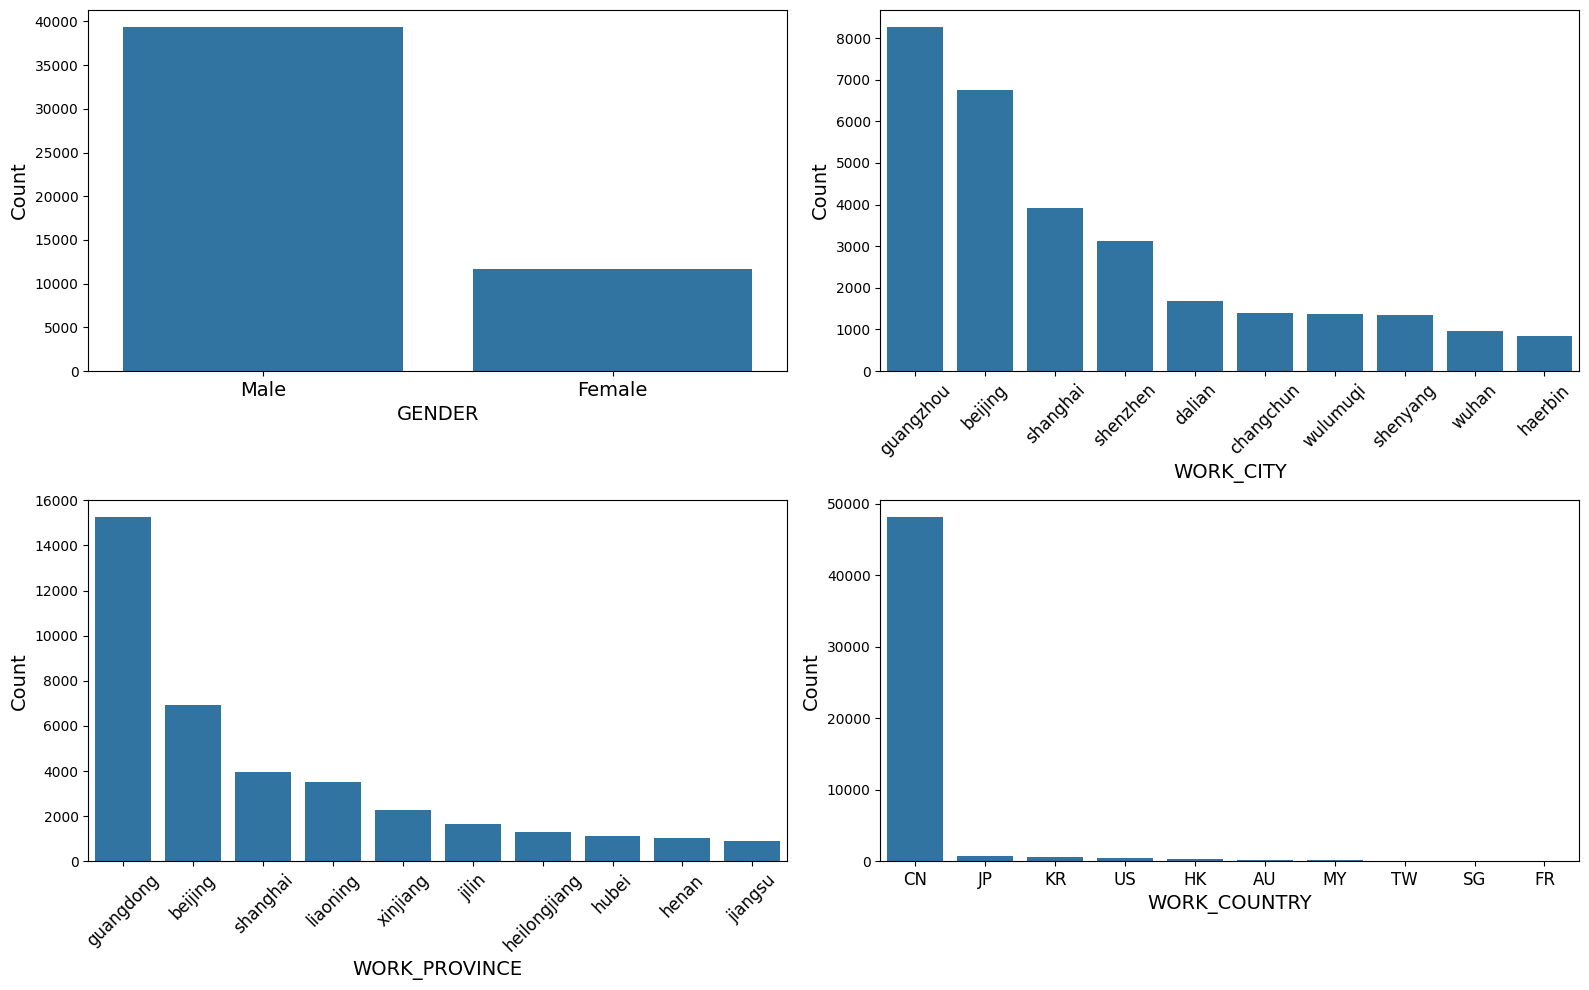

In [39]:
# Make figure and axes objects
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

# Countplot for gender
sns.countplot(x='GENDER',data=df_clean,ax=ax[0,0])
ax[0,0].tick_params(axis='x',labelsize=14)
ax[0,0].set_xlabel('GENDER',fontsize=14)
ax[0,0].set_ylabel('Count',fontsize=14)

# Barplot for work_city
work_city_top10 = df_clean['WORK_CITY'].value_counts().head(10)
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0,1])
ax[0,1].tick_params(axis='x', labelrotation= 45,labelsize=12)
ax[0,1].set_xlabel('WORK_CITY',fontsize=14)
ax[0,1].set_ylabel('Count',fontsize=14)

# Barplot for work_province
work_province_top10 = df_clean['WORK_PROVINCE'].value_counts().head(10)
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1,0])
ax[1,0].tick_params(axis='x', labelrotation= 45,labelsize=12)
ax[1,0].set_xlabel('WORK_PROVINCE',fontsize=14)
ax[1,0].set_ylabel('Count',fontsize=14)

# Barplot for work_country
work_country_top10 = df_clean['WORK_COUNTRY'].value_counts().head(10)
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[1,1])
ax[1,1].tick_params(axis='x', labelsize=12)
ax[1,1].set_xlabel('WORK_COUNTRY',fontsize=14)
ax[1,1].set_ylabel('Count',fontsize=14)

plt.tight_layout()

In [40]:
# Convert to datetime object
ffp_date = pd.to_datetime(df_clean['FFP_DATE'])
# Get the year and month
ffp_date_year = ffp_date.dt.year
ffp_date_month = ffp_date.dt.month

Text(0.5, 0, 'FFP Date Month')

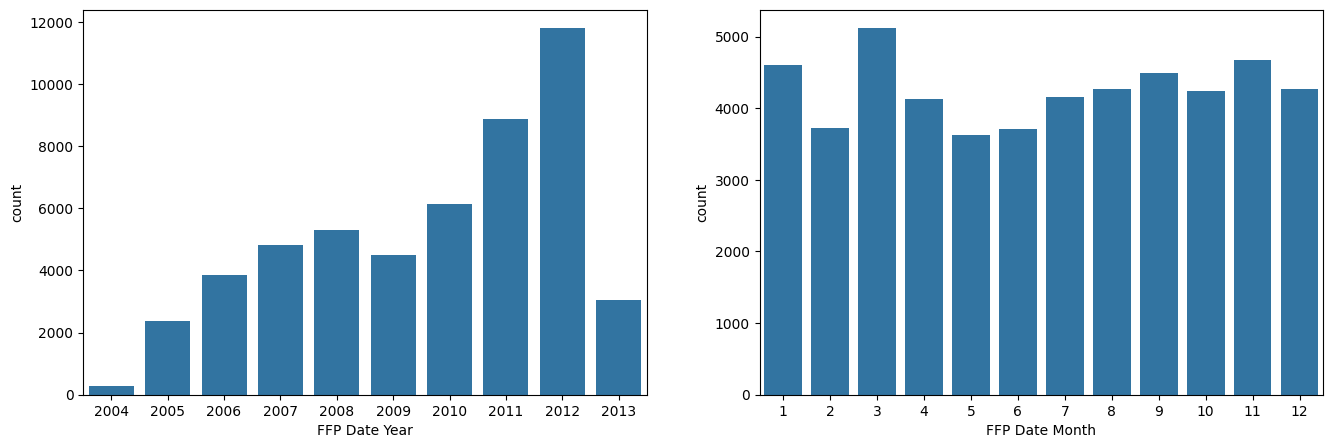

In [41]:
# Check the countplot
plt.figure(figsize=(16,5))

# Countplot for year
plt.subplot(1,2,1)
sns.countplot(x=ffp_date_year)
plt.xlabel('FFP Date Year')

plt.subplot(1,2,2)
sns.countplot(x=ffp_date_month)
plt.xlabel('FFP Date Month')

Univariate study: numerical columns

In [42]:
# Summary statistics
df_clean[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,51018.0,31610.509879,18189.959446,3.000000,15830.500000,31687.500000,47412.750000,62988.0
FFP_TIER,51018.0,4.118429,0.399552,4.000000,4.000000,4.000000,4.000000,6.0
AGE,51018.0,42.471363,9.680427,6.000000,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,51018.0,13.429711,14.708066,2.000000,4.000000,8.000000,17.000000,213.0
BP_SUM,51018.0,12480.156827,16928.159237,0.000000,3560.000000,7023.000000,14637.000000,505308.0
SUM_YR_1,51018.0,6022.523443,8452.584505,0.000000,1420.000000,3441.500000,7430.000000,239560.0
SUM_YR_2,51018.0,6418.042612,9075.616945,0.000000,1351.000000,3554.000000,7871.000000,234188.0
SEG_KM_SUM,51018.0,19450.835607,21595.925770,1380.000000,6460.000000,12195.000000,24037.500000,580717.0
LAST_TO_END,51018.0,151.830119,167.470700,1.000000,24.000000,87.000000,220.000000,730.0
AVG_INTERVAL,51018.0,62.738010,64.197936,0.000000,25.178571,44.444444,77.000000,714.0


In [43]:
# Check the oldest customer
df_clean[df_clean['AGE']==110]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,20264,4/14/2005,5/18/2005,Female,4,shenzhenshi,guangdong,CN,110.0,3/31/2014,...,2888.0,14053,4/6/2013,361,50.333333,214,1,0.740881,11194,3


In [44]:
# Check the highest SEG_KM_SUM
df_clean[df_clean['SEG_KM_SUM']==df_clean['SEG_KM_SUM'].max()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50


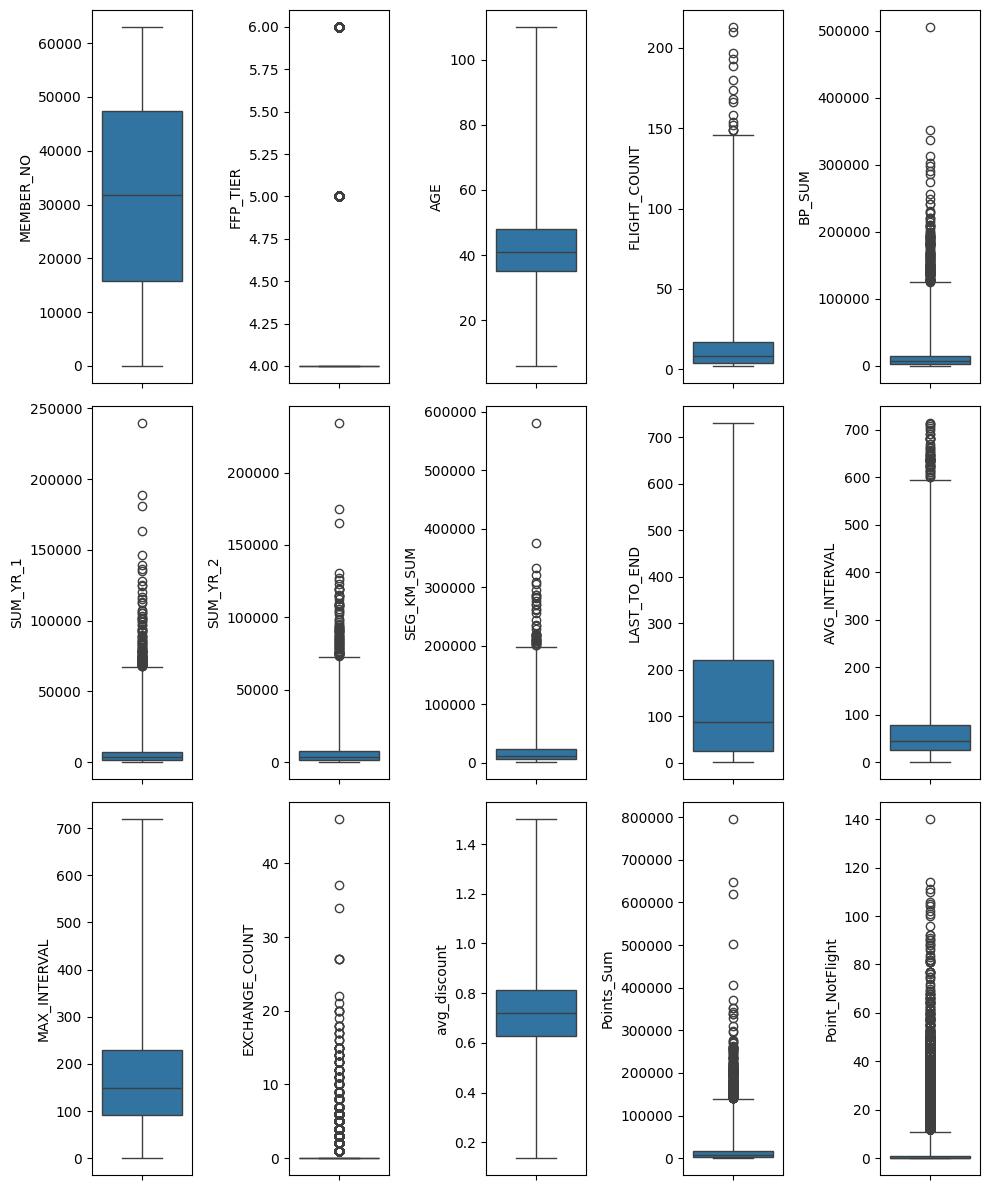

In [45]:
# Plot the distribution using boxplot
# Pick numerical columns
df_num = df_clean.select_dtypes(['int64','float64'])

plt.figure(figsize=(10,12))

for i, col in enumerate(df_num):
    plt.subplot(3,5,i+1)
    sns.boxplot(y=df[col],whis=10.)
    plt.tight_layout()

<Axes: >

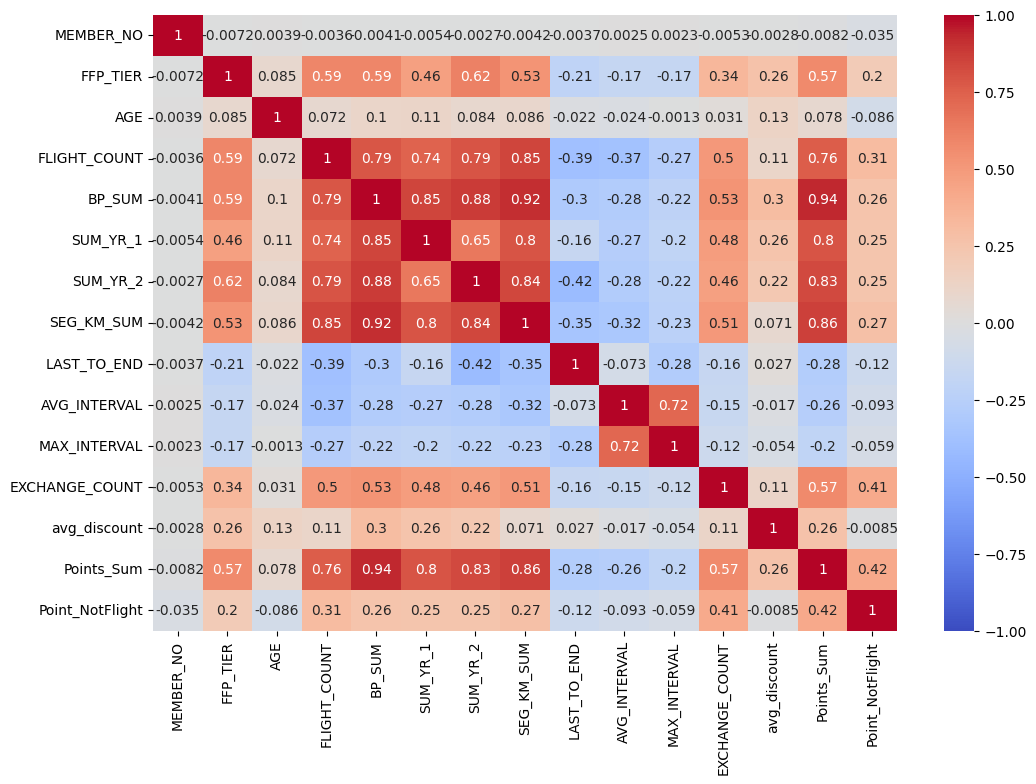

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean[num_cols].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

<Axes: xlabel='BP_SUM', ylabel='Points_Sum'>

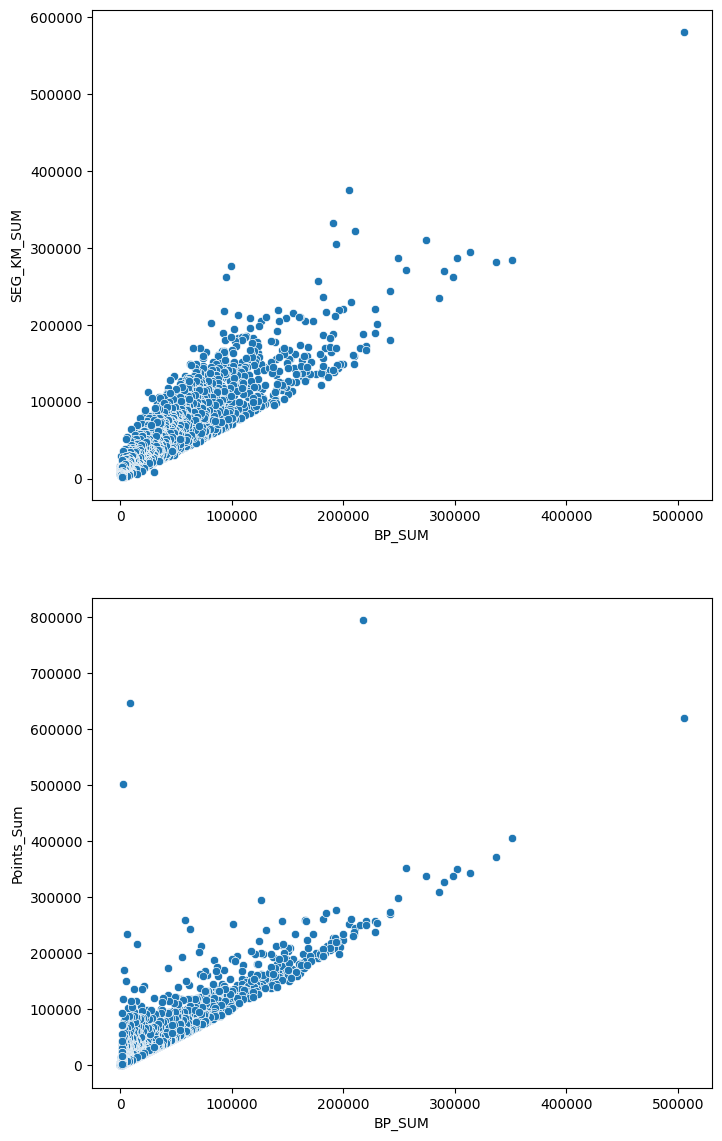

In [47]:
# Scatterplot to see the correlation more clearly
plt.figure(figsize=(8,14))
plt.subplot(2,1,1)
sns.scatterplot(x='BP_SUM',y='SEG_KM_SUM',data=df_clean)

plt.subplot(2,1,2)
sns.scatterplot(x='BP_SUM',y='Points_Sum',data=df_clean)

 Features: LRFMC model
I am going to use the LRFMC model to segment the customers, where LRFMC stands for:

L (Loyalty): duration between the start of membership until the time the data were obtained.
R (Recency): duration between the last time the customer had a flight until the time the data were obtained.
F (Frequency): total number of flights within the observation window.
M (Monetary): total distance of flights within the observation window.
C (Cabin): average discount gained by the customer within the observation window. Generally, larger discount corresponds to higher class in flights.

In [48]:
# Ignore warnings
pd.options.mode.chained_assignment = None

# Convert date columns to datetime type
df_clean['LOAD_TIME'] = pd.to_datetime(df_clean['LOAD_TIME'])
df_clean['FFP_DATE'] = pd.to_datetime(df_clean['FFP_DATE'])

# Calculate L (difference between LOAD_TIME and FFP_DATE) in days
df_clean['L'] = (df_clean['LOAD_TIME'] - df_clean['FFP_DATE']).dt.days

# Get R (day since last flight)
df_clean['R'] = df_clean['LAST_TO_END']

# Get F (flight frequency)
df_clean['F'] = df_clean['FLIGHT_COUNT']

# Get M (total mileage)
df_clean['M'] = df_clean['SEG_KM_SUM']

# Get C (average discount)
df_clean['C'] = df_clean['avg_discount']


In [49]:
# Check the distribution
# Make a function to plot boxplot and histogram
def plot_lrfmc(df,feature,axis_label):
    # Plot style
    sns.set(style="ticks")

    # Feature to be plotted
    x = df[feature].values

    # Define figure and axes objects
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)},figsize=(8,6))

    # Plot boxplot and histogram
    sns.boxplot(x=x, ax=ax_box)
    sns.histplot(x=x, ax=ax_hist,kde=True)

    # Delete boxplot ticks
    ax_box.set(yticks=[])
    # Delete some frames of the figure
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    # Label for x axis
    plt.xlabel(axis_label,fontsize=20)
    return

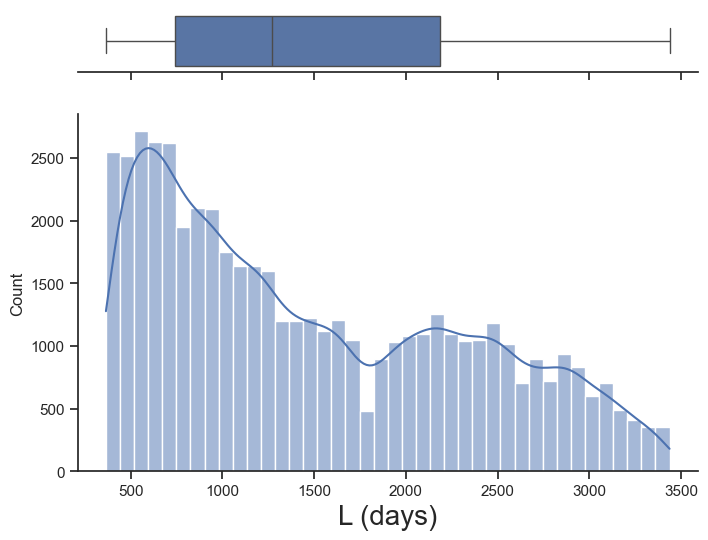

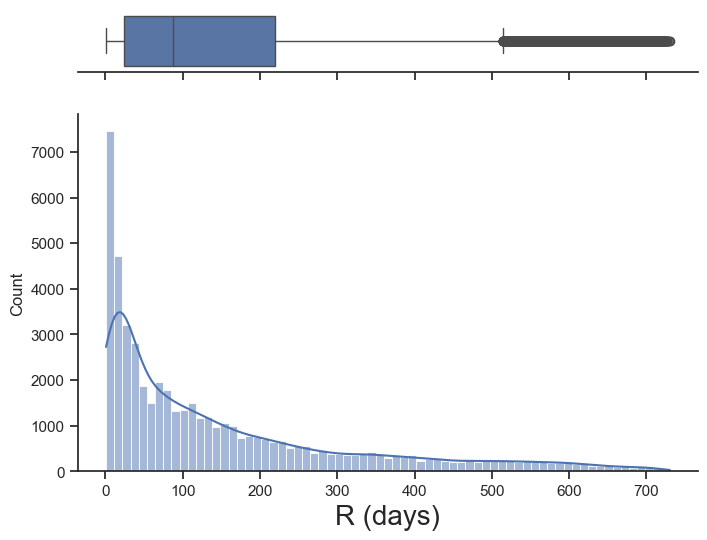

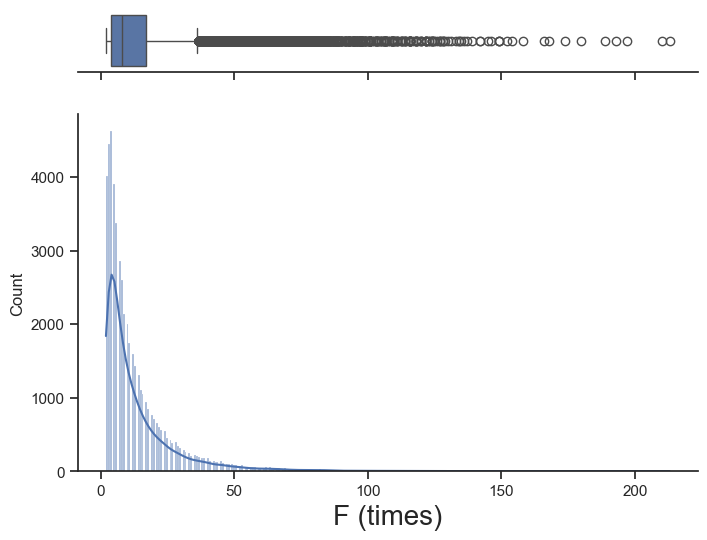

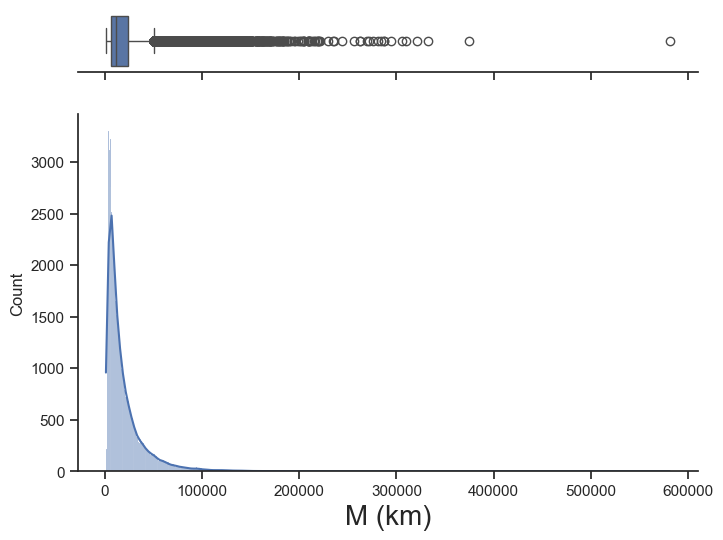

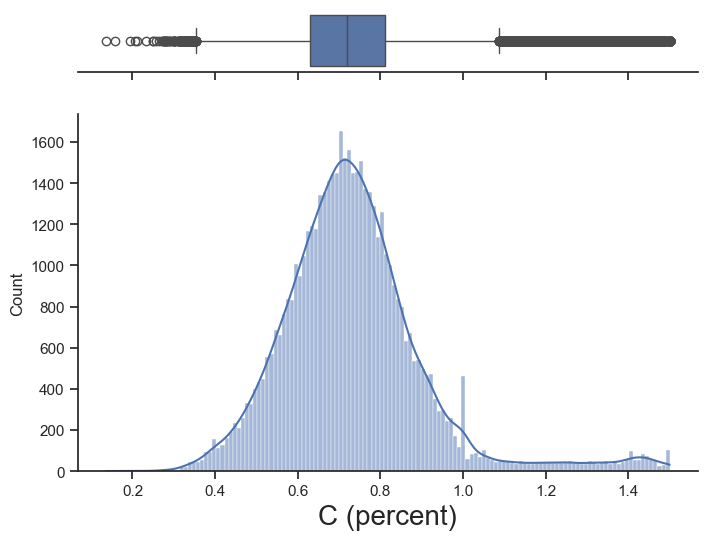

In [50]:
# Distribution of L
plot_lrfmc(df_clean,'L','L (days)')

# Distribution of R
plot_lrfmc(df_clean,'R','R (days)')

# Distribution of F
plot_lrfmc(df_clean,'F','F (times)')

# Distribution of M
plot_lrfmc(df_clean,'M','M (km)')

# Distribution of C
plot_lrfmc(df_clean,'C','C (percent)')

In [51]:
# Store all of the relevant features (LRFMC) into a new dataframe
df_lrfmc = df_clean[['L','R','F','M','C',]]

# Top 5 rows
df_lrfmc

,L,R,F,M,C
0,2706,1,210,580717,0.961639
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658
5,2241,79,92,294585,0.967692
...,...,...,...,...,...
54994,1134,82,4,4237,0.473361
54995,426,368,2,3453,0.580828
54996,1963,387,2,3820,0.525000
54998,1382,22,4,2596,0.772500


Multivariate study

<Axes: >

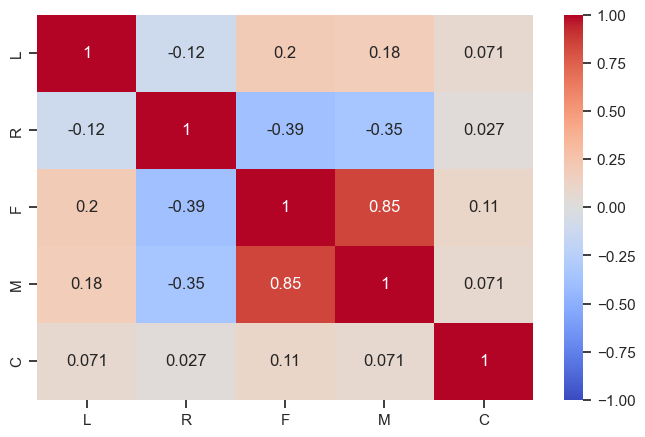

In [52]:
# Create correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_lrfmc.corr(),annot=True,cmap='coolwarm',vmin=-1.,vmax=1.)

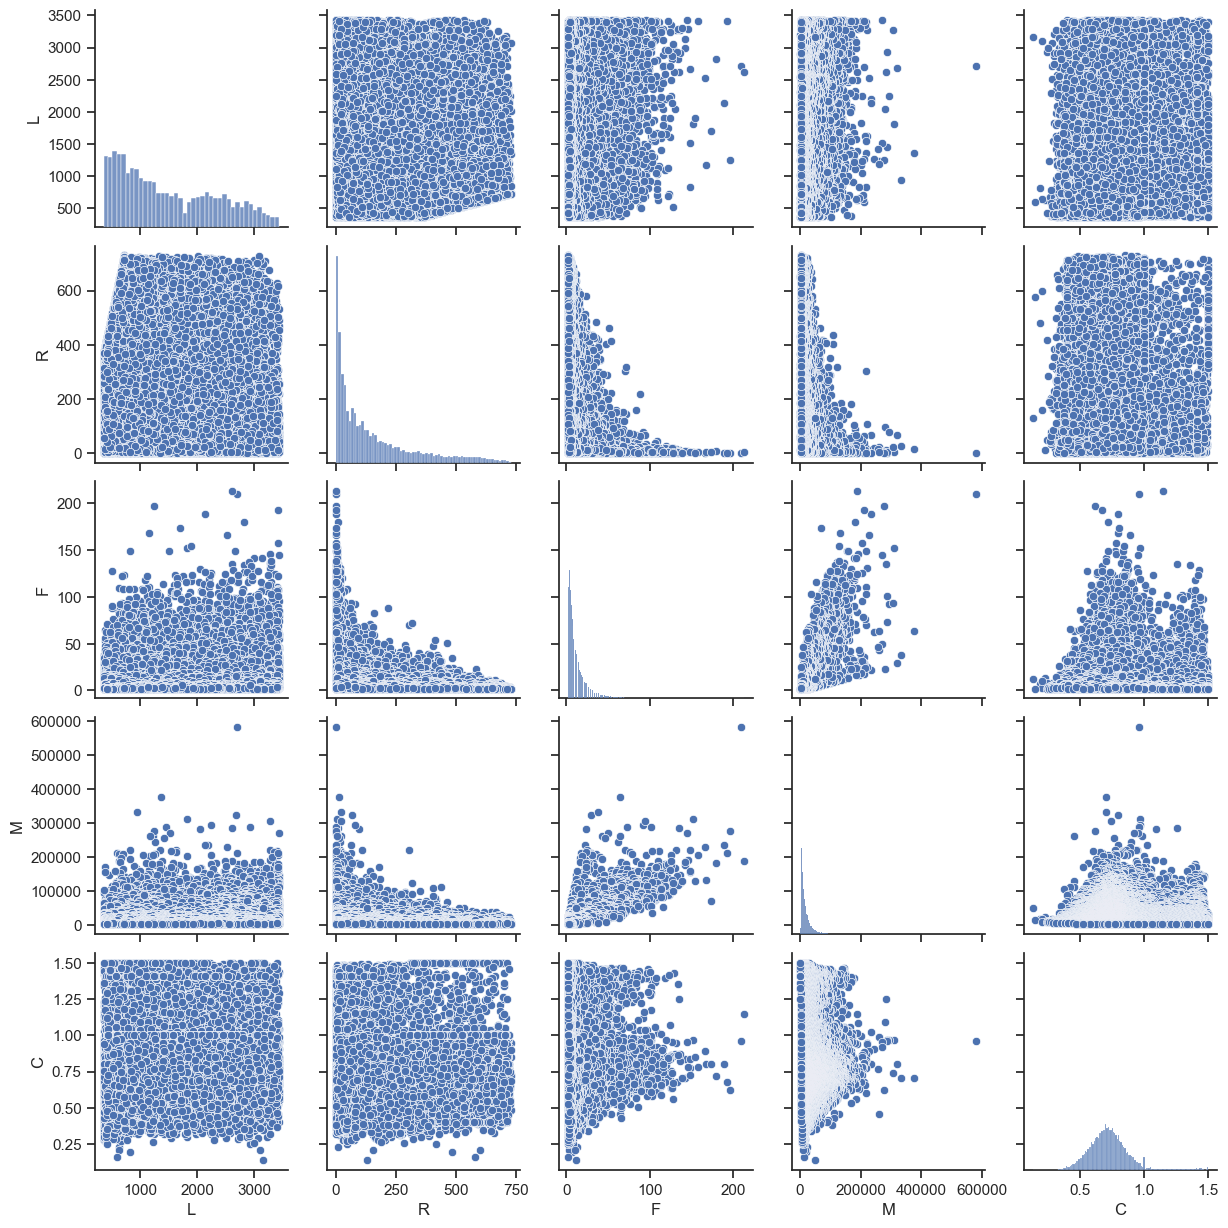

In [53]:
# Create pairplot
sns.pairplot(df_lrfmc)

Customer Segmentation with K-Means

In [54]:
# Transform to logarithmic units
df_lrfmc['F'] = np.log10(df_lrfmc['F'])
df_lrfmc['M'] = np.log10(df_lrfmc['M'])

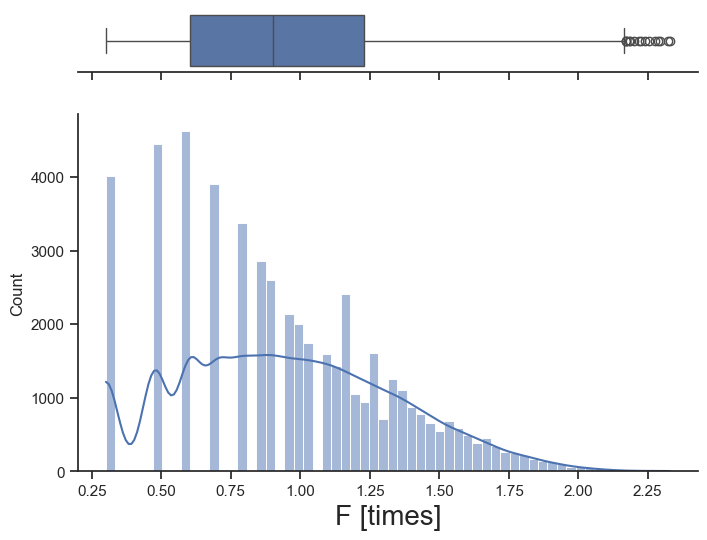

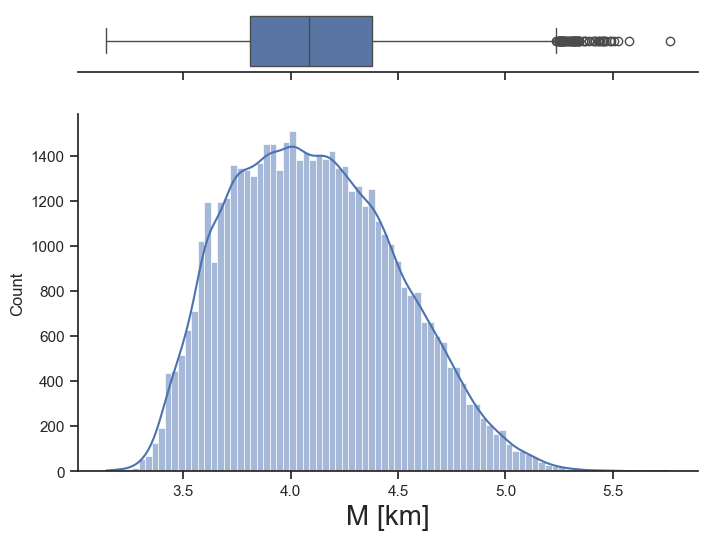

In [55]:
# Check the distribution again
plot_lrfmc(df_lrfmc,'F','F [times]')

plot_lrfmc(df_lrfmc,'M','M [km]')

Scale the Features

In [56]:
# Import standardscaler
from sklearn.preprocessing import StandardScaler

# Create an instance for the scaler
scaler = StandardScaler()
# Standardize the LRFMC
scaler.fit(df_lrfmc)
lrfmc_std = scaler.transform(df_lrfmc)

# Check top 5 rows
df_lrfmc_std = pd.DataFrame(data=lrfmc_std,columns=['L','R','F','M','C'])
df_lrfmc_std.head()

,L,R,F,M,C
0,1.442178,-0.900645,3.533487,4.317281,1.287012
1,1.334374,-0.840932,3.040917,3.505003,2.952774
2,0.661487,-0.327404,1.067908,3.495466,2.021621
3,0.387831,-0.876760,3.173143,3.605225,1.338279
4,0.891311,-0.434887,2.613394,3.547650,1.321422


In [57]:
# Import K-means
from sklearn.cluster import KMeans

# Create an empty list for the inertias (WSCC)
inertia = []

# Range of k to be tested
k_values = range(2,11)

# Try different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_lrfmc_std)
    inertia.append(kmeans.inertia_)

In [59]:
! pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [60]:
from yellowbrick.cluster import KElbowVisualizer

Text(0, 0.5, 'Inertia')

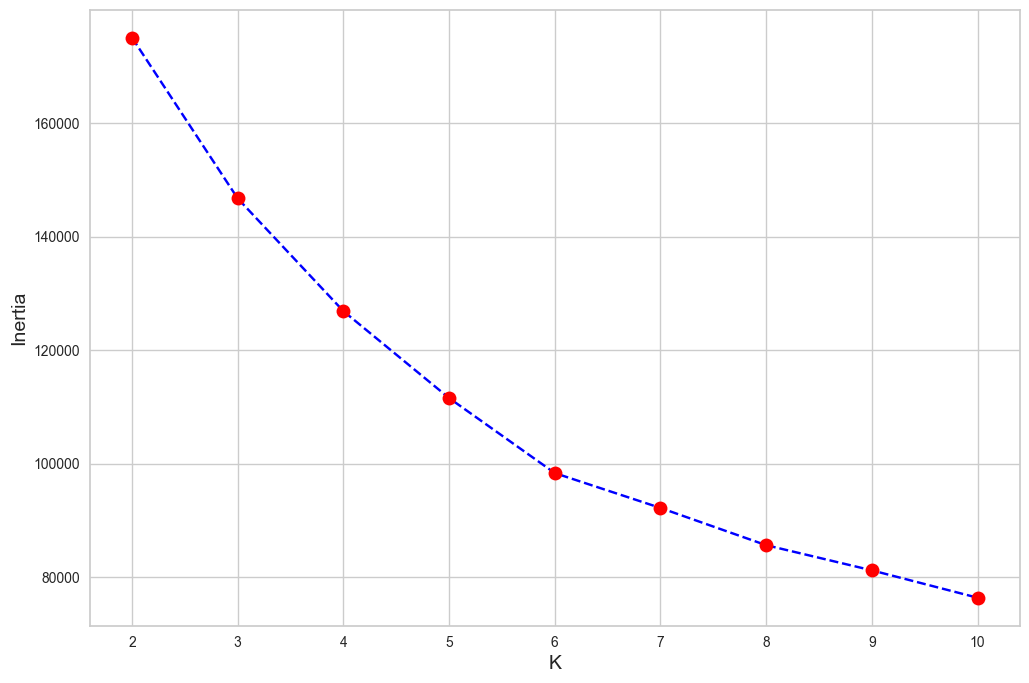

In [61]:
# Import elbow visualizer from yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Plot inertia vs k values using yellowbrick
plt.figure(figsize=(12, 8))

plt.plot(k_values,inertia,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K',fontsize=14)
plt.ylabel('Inertia',fontsize=14)

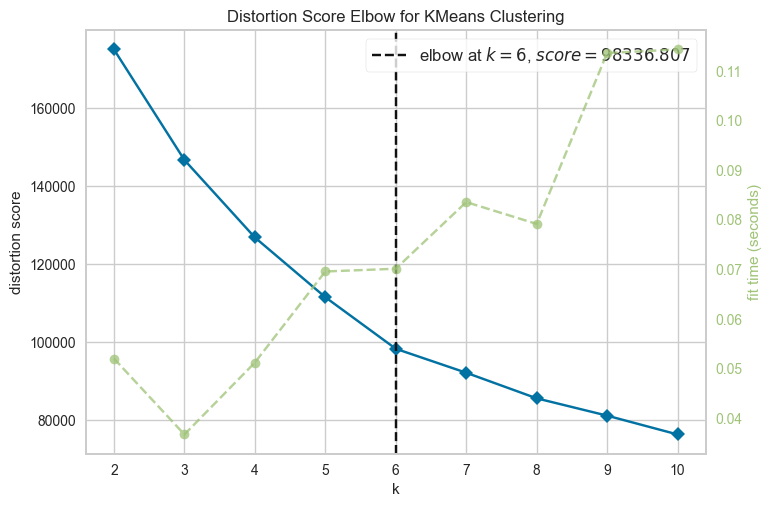

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# We can also use yellowbrick to visualize inertia vs k
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='distortion', timings=True, locate_elbow=True
)

visualizer.fit(df_lrfmc_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

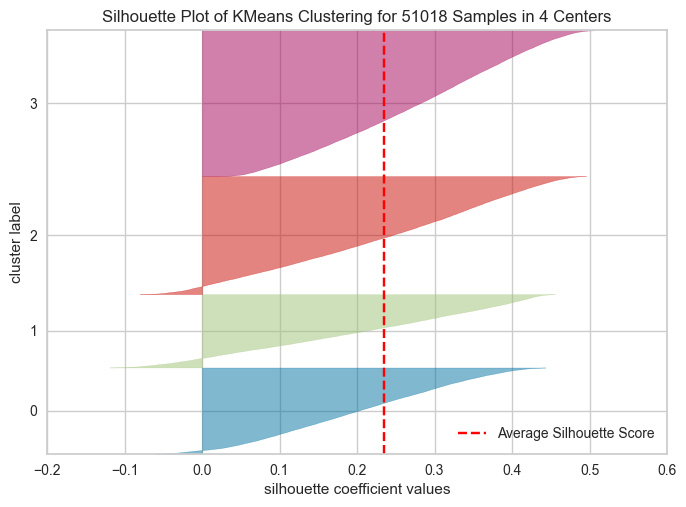

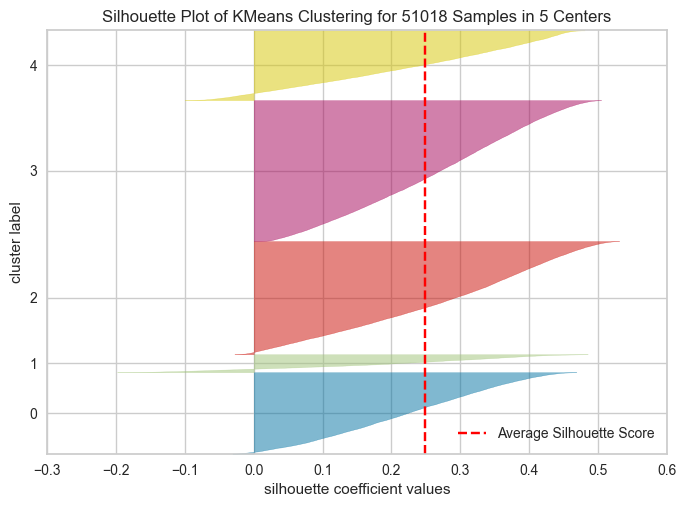

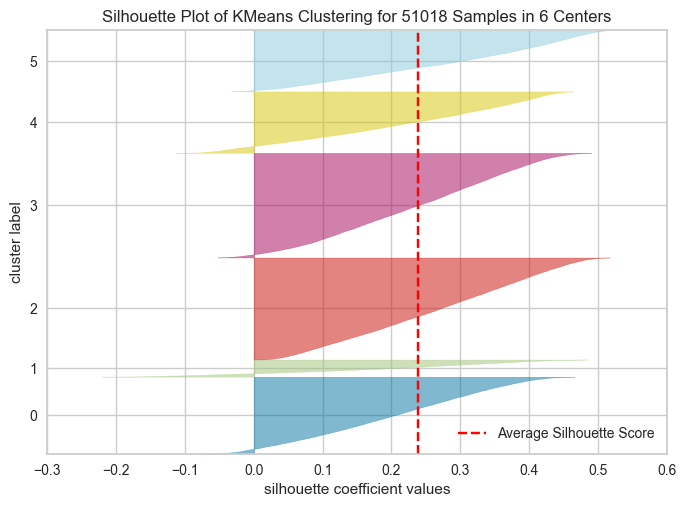

In [63]:
# Use yellowbrick to create silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
for i in [4,5,6]:
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # Fit the data to the visualizer
    visualizer.fit(df_lrfmc_std)        
    visualizer.show()

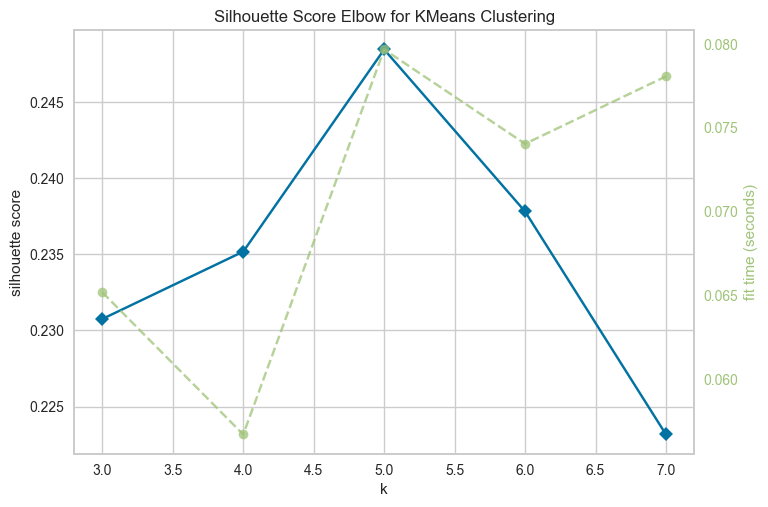

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [64]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(3,8), metric='silhouette', timings=True, locate_elbow=False
)

visualizer.fit(df_lrfmc_std)        # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure

In [70]:
from sklearn.decomposition import PCA

# Visualize the segmentation along 2 principal axes (using PCA)
def plot_clusters(df, k_value):
    kmeans = KMeans(n_clusters=k_value,random_state=7)
    kmeans.fit(df)
    
    # Visualization with PCA
    pca = PCA(n_components=2)
    pca.fit(df)
    pcs = pca.transform(df)

    # Store to a new dataframe
    df_lrfmc_pca = pd.DataFrame(data=pcs,columns=['PC1','PC2'])
    df_lrfmc_pca['cluster'] = kmeans.labels_
    
    # Visualization
    plt.figure(figsize=(10,6))

    # Color for each cluster
    color_list = ['red','blue','green','orange','purple','pink']
    color_list = color_list[:k_value]
    
    for i in range(len(df_lrfmc_pca['cluster'].unique())):
        df_dummy = df_lrfmc_pca[df_lrfmc_pca['cluster']==i]
        plt.scatter(df_dummy['PC1'],df_dummy['PC2'],c=color_list[i],s=5,label=f'Cluster {i}')
        # Centroid positions
        plt.scatter(df_dummy['PC1'].mean(),df_dummy['PC2'].mean(),c=color_list[i],marker='X',edgecolor='k',s=250,zorder=10)

    plt.legend()
    plt.title(f'Segmentation for {k_value} clusters')
    plt.xlabel('PC1',fontsize=14)
    plt.ylabel('PC2',fontsize=14)

    return

Cluster Analysis

In [66]:
# Using k=6 and save the labels
kmeans = KMeans(n_clusters=6,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

In [67]:
# Create a function to plot median LRFMC
def snake_plot(df_lrfmc_std, n_clusters):
    
    # Create segmentation
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(df_lrfmc_std)
    df_labels = pd.DataFrame(kmeans.labels_,columns=['cluster'])
    df_clusters = df_lrfmc_std.join(df_labels)
    
    # Create summary dataframe
    lrfmc_summary = df_clusters.groupby(['cluster']).agg(num_members=('cluster','size'),
                                                  median_L=('L','median'),
                                                  median_R=('R','median'),
                                                  median_F=('F','median'),
                                                  median_M=('M','median'),
                                                  median_C=('C','median')).reset_index()
    
    # Melt dataframe into long format
    df_melt = pd.melt(lrfmc_summary.reset_index(), 
                            id_vars=['cluster'],
                            value_vars=['median_L', 'median_R', 'median_F','median_M','median_C'], 
                            var_name='Metric', 
                            value_name='Value')

    plt.figure()
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')
    
    return

,member,count
0,3,12612
1,2,12297
2,0,9279
3,4,7403
4,5,7363
5,1,2064


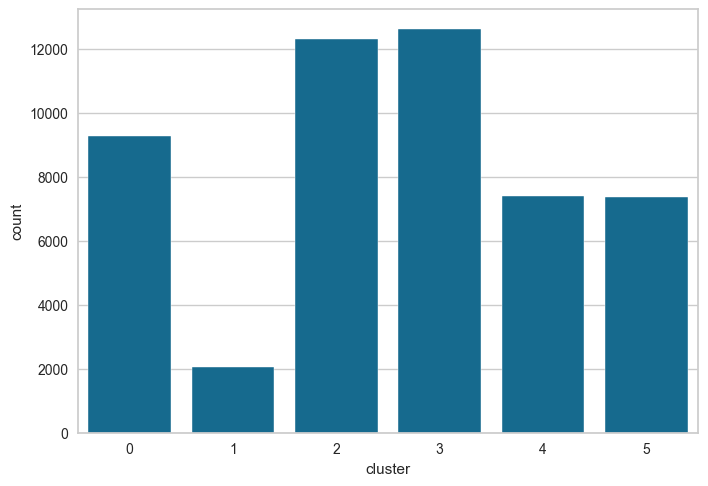

In [68]:
##### Check cluster composition
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

Radar Chart

In [71]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.8 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 4.3 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 4.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.8 MB 3.9 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 3.7 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 3.9 MB/s eta 0:00:02
   ---------------------------- ----------- 7.1/9.8 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.7 MB/s  0:00:02


In [91]:
! pip install nbformat --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [93]:
# Radar chart using plotly
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# List of feature names
categories = ['L','R','F','M','C']

# Create summary statistics using the standardized LRFMC
lrfmc_summary = df_clusters.groupby(['cluster']).agg(
    L=('L','median'),
    R=('R','median'),
    F=('F','median'),
    M=('M','median'),
    C=('C','median')
).reset_index()

# Normalize values (0–1) so clusters are comparable
scaler = MinMaxScaler()
lrfmc_summary[categories] = scaler.fit_transform(lrfmc_summary[categories])

# Create figure
fig = go.Figure()

# Make radar chart for every cluster
for i, row in lrfmc_summary.iterrows():
    fig.add_trace(go.Scatterpolar(
          r=row[categories].values,
          theta=categories,
          fill='toself',
          name=f'Cluster {row["cluster"]}'
    ))

# Layout settings
fig.update_layout(
  polar=dict(
    radialaxis=dict(visible=True, range=[0, 1])  # normalized scale
  ),
  showlegend=True,
  title="LRFMC Cluster Radar Chart (Normalized)"
)
import plotly.io as pio
pio.renderers.default = "browser"
fig.show()


Clustering Using k=5 and k=7

,member,count
0,3,16990
1,2,13638
2,0,9821
3,4,8413
4,1,2156


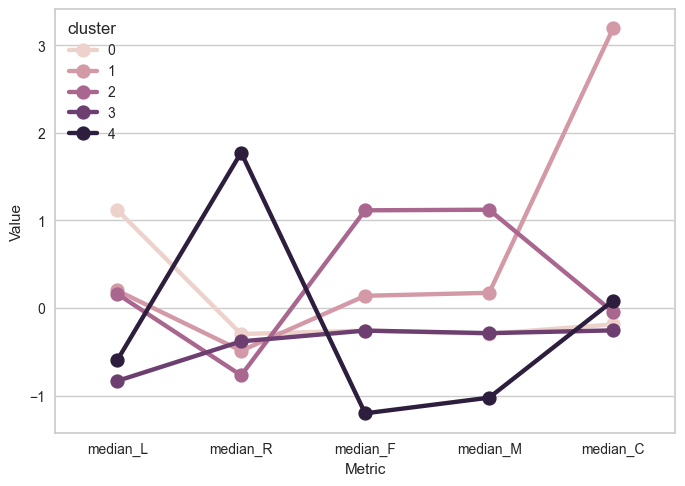

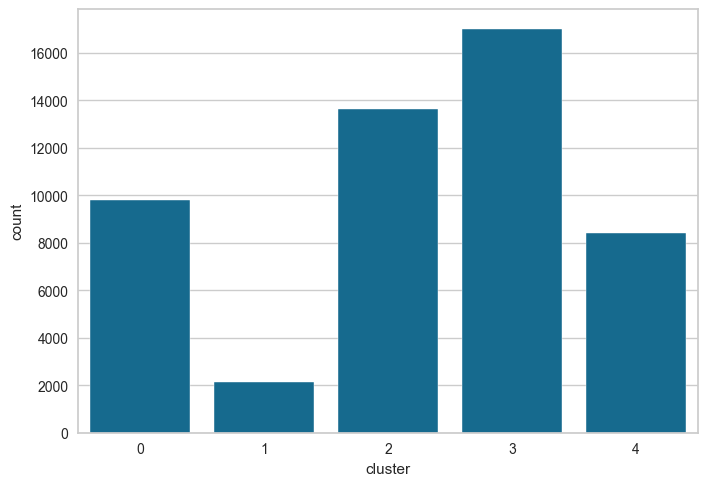

In [87]:
# For k = 5
snake_plot(df_lrfmc_std,5)

# Using k=5 and save the labels
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

##### Check cluster composition
plt.figure()
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

,member,count
0,3,12265
1,2,11258
2,6,7511
3,4,6984
4,0,5785
5,5,5225
6,1,1990


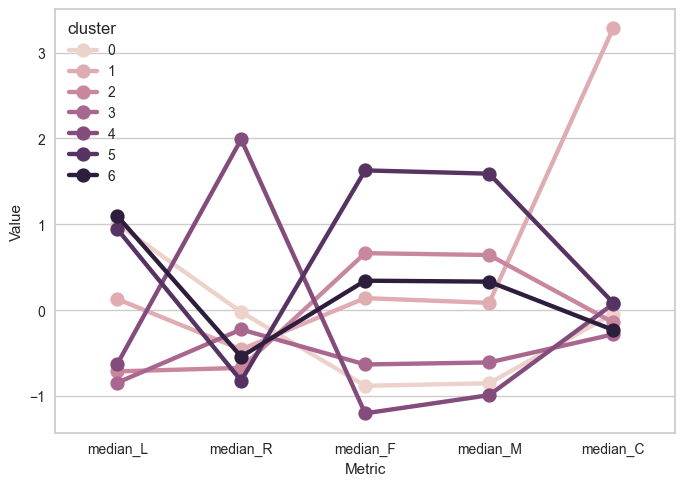

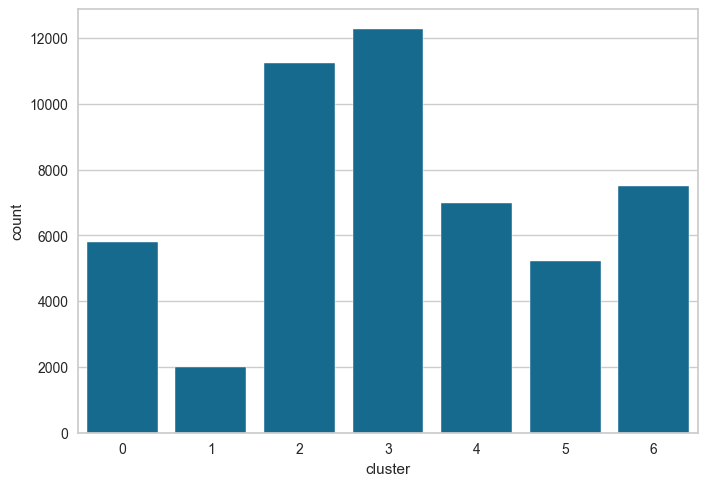

In [88]:
# For k = 7
snake_plot(df_lrfmc_std,7)

# Using k=7 and save the labels
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

##### Check cluster composition
plt.figure()
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

Analysis for k=5:

Looking at the snake plot above, we can readily notice some similarities with our benchmark model (k=6), and the most obvious difference is the omittance of cluster with high C (cluster 4 in our benchmark model), which is merged to the other 5 clusters. Therefore, by omitting 1 cluster from our benchmark model, we lose our potential VIP customers, and thus this model may not be optimal to use.

Analysis for k=7:

By including 1 additional cluster, we notice cluster 6 in this model, where the customers have much lower value for C. However, the other LRFM features of this cluster is more or less the same with cluster 4, indicating redundancy. Therefore, adding another cluster does not significantly improve our customer segmentation.

Conclusions
We use the Airline Customer dataset from Kaggle to create a customer segmentation model.
Most of the members in this airline company come from Guangzhou, China, and joined in the year 2012.
We use the LRFMC model: loyalty, recency, frequency, monetary, and cabin as features, following previous work on airline dataset.
Using the K-means algorithm for the clustering algorithm, and determining the optimal value of k using the elbow method in combination with the silhouette score, we find that k=6 gives the best customer segmentation.
In this benchmark model, the typical F and M values are unique for each cluster, and so we can implement membership levels with increasing benefits to push customer consumption and increase their loyalty.
We also try using k=5 and k=7 to see what information we gain/loose. With 5 clusters only, we lose our potential VIP customers. In the other hand, adding an additional cluster does not improve our segmentation model.

#References
RFM Segmentation in E-Commerce: https://towardsdatascience.com/rfm-segmentation-in-e-commerce-e0209ce8fcf6 by Pararawendy Indarjo (Towards Data Science).
RFM Model for Customer Value of Air Company: https://www.kaggle.com/code/vinzzhang/rfm-model-for-customer-value-of-air-company/data?select=air_data.csv by Vincent Zhang (Kaggle).
Customer modeling and analysis of civil aviation industry based on Python data analysis: https://pythonmana.com/2021/12/202112130116081138.html by user Mr. thirteen Po (pythonmana).
KMeans Silhouette Score Explained With Python Example: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=The%20silhouette%20plots%20can%20be,thickness%20of%20the%20silhouette%20plot. by Ajitesh Kumar (DZone).
Chen, T. & Wang, P. (2022). IJRES vol. 10 issue 4 pp. 05-13.
Tao, Y. (2020). ICPCSEE 2020. Communications in Computer and Information Science, vol 1257. Springer, Singapore. https://doi.org/10.1007/978-981-15-7981-3_7